# Inżynieria Cyberbezpieczeństwa

## Poszukiwanie Modelu Wykrywającego Anomalie

[Artykuł o modelowaniu ataków na urządzenia IoT](https://www.sciencedirect.com/science/article/pii/S2667295221000374)

[O zbiorze danych](https://www.researchgate.net/publication/341169837_A_Scheme_for_Generating_a_Dataset_for_Anomalous_Activity_Detection_in_IoT_Networks)


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('idea_3_iot/IoT Network Intrusion Dataset.csv')

In [ ]:
df.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg


In [ ]:
df.describe()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.00000,625783.000000,625783.000000,625783.000000,625783.000000,...,625783.000000,625783.0,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000
mean,35026.156190,16387.027479,9.971436,635.422865,1.675566,1.46853,570.738980,929.280973,392.489726,348.126571,...,1.509913,0.0,3.764405,0.353385,4.248735,3.462159,502.503832,52.403995,561.540512,467.264459
std,24721.047752,17550.363037,5.379857,3496.740723,4.309970,1.21949,1161.873195,1731.760875,619.575865,588.161845,...,4.332737,0.0,68.064508,20.723370,88.934148,64.111043,2112.957360,1153.184897,2866.497606,1931.909971
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9020.000000,8899.000000,6.000000,76.000000,0.000000,1.00000,0.000000,18.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,73.000000,0.000000,74.000000,71.000000
50%,51991.000000,9020.000000,6.000000,132.000000,1.000000,1.00000,32.000000,104.000000,30.000000,30.000000,...,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,93.500000,0.000000,114.000000,78.000000
75%,56361.000000,10101.000000,17.000000,221.000000,2.000000,2.00000,1388.000000,1441.000000,1388.000000,386.000000,...,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,141.000000,1.527525,154.000000,130.000000
max,65500.000000,65371.000000,17.000000,99984.000000,186.000000,560.00000,109846.000000,773284.000000,1464.000000,1464.000000,...,186.000000,0.0,9044.625000,8598.658250,26785.000000,6659.000000,99973.000000,67071.906623,99973.000000,99973.000000


In [ ]:
df.columns

Index(['Flow_ID', 'Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port', 'Protocol',
       'Timestamp', 'Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts',
       'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags',
       'Bwd_URG_Flags', 'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s',
       'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean',
       'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt',
       'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'URG_Flag_Cnt',
       'CWE_Flag_Count', 'ECE_

In [ ]:
df.Label.value_counts()

Anomaly    585710
Normal      40073
Name: Label, dtype: int64

In [ ]:
df.Cat.value_counts()

Mirai                415677
Scan                  75265
DoS                   59391
Normal                40073
MITM ARP Spoofing     35377
Name: Cat, dtype: int64

In [ ]:
df.Sub_Cat.value_counts()

Mirai-UDP Flooding       183554
Mirai-Hostbruteforceg    121181
DoS-Synflooding           59391
Mirai-HTTP Flooding       55818
Mirai-Ackflooding         55124
Scan Port OS              53073
Normal                    40073
MITM ARP Spoofing         35377
Scan Hostport             22192
Name: Sub_Cat, dtype: int64

Będziemy predykować rodzaj ataku / brak ataku - czyli kolumna Cat

In [ ]:
df = df.drop(['Sub_Cat', 'Label'], 1)

Usuwanie niepotrzebnych kolumn wg. pierwotnego artykułu
"We remove two fields related to Flow_Byts due to the infinite records.", czyli 'Flow_Byts/s', 'Flow_Pkts/s'

In [ ]:
df = df.drop(['Flow_Byts/s', 'Flow_Pkts/s'], 1)

"By looking at the sample data, we identify several uninformative columns such as generated IDs and timestamps."

In [ ]:
df = df.drop(['Flow_ID', 'Timestamp'], 1)

"We also check for NaN and all zero columns, and we remove them from the original dataset."

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing})
missing

,column_name,percent_missing
Src_IP,Src_IP,0.0
Src_Port,Src_Port,0.0
Dst_IP,Dst_IP,0.0
Dst_Port,Dst_Port,0.0
Protocol,Protocol,0.0
...,...,...
Idle_Mean,Idle_Mean,0.0
Idle_Std,Idle_Std,0.0
Idle_Max,Idle_Max,0.0
Idle_Min,Idle_Min,0.0


Nie wygląda na to, zeby były jakiekolwiek NaNy.

In [ ]:
zeros = pd.DataFrame({'column_name': df.columns, 'percent_zeros': df[df == 0].count(axis=0)/df.shape[0]})
zeros

,column_name,percent_zeros
Src_IP,Src_IP,0.000000
Src_Port,Src_Port,0.010091
Dst_IP,Dst_IP,0.000000
Dst_Port,Dst_Port,0.010091
Protocol,Protocol,0.010091
...,...,...
Idle_Mean,Idle_Mean,0.014686
Idle_Std,Idle_Std,0.669978
Idle_Max,Idle_Max,0.014686
Idle_Min,Idle_Min,0.014686


In [ ]:
only_zero_columns = zeros[zeros.percent_zeros == 1].column_name.tolist()
only_zero_columns

['Fwd_PSH_Flags',
 'Fwd_URG_Flags',
 'Fwd_Byts/b_Avg',
 'Fwd_Pkts/b_Avg',
 'Fwd_Blk_Rate_Avg',
 'Bwd_Byts/b_Avg',
 'Bwd_Pkts/b_Avg',
 'Bwd_Blk_Rate_Avg',
 'Fwd_Seg_Size_Min']

In [ ]:
df = df.drop(only_zero_columns, 1)

Kolumna Init_Fwd_Win_Byts ma same -1

In [ ]:
df.Init_Fwd_Win_Byts.value_counts()

-1    625783
Name: Init_Fwd_Win_Byts, dtype: int64

In [ ]:
df = df.drop('Init_Fwd_Win_Byts', 1)

Teraz należy wyrzucić mocno skorelowane kolumny

Wg. artykułu o zbiorze danych mocno skorelowane (ponad 0.7) są:
Active_Max, Bwd_IAT_Max, Bwd_Seg_Size_Avg, Fwd_IAT_Max,
Fwd_Seg_Size_Avg, Idle_Max, PSH_Flag_Cnt, Pkt_Size_Avg,
Subﬂow_Bwd_Byts, Subﬂow_Bwd_Pkts, Subﬂow_Fwd_Byts,
Subﬂow_Fwd_Pkts

Deepnote pokazuje błąd, że brak już pamięci, dlatego już wezmę podzbiór, a potem korelacje

In [ ]:
df.shape

(625783, 70)

Zanim wyrzucę, to stworzę zbalansowany zbiór danych

In [ ]:
df.Cat.value_counts()

Mirai                415677
Scan                  75265
DoS                   59391
Normal                40073
MITM ARP Spoofing     35377
Name: Cat, dtype: int64

In [ ]:
min_count = df.Cat.value_counts().min()
min_count

35377

In [ ]:
categories = df.Cat.value_counts().index.tolist()
categories

['Mirai', 'Scan', 'DoS', 'Normal', 'MITM ARP Spoofing']

In [ ]:
list_split_by_categories = [df[df["Cat"] == cat] for cat in categories]

In [ ]:
# downsample each category
from sklearn.utils import resample

for i in range(len(list_split_by_categories)):
    list_split_by_categories[i] = resample(list_split_by_categories[i],
                                           replace=True,
                                           n_samples=min_count,
                                           random_state=42)

In [ ]:
df_balanced = pd.concat(list_split_by_categories)
df_balanced.Cat.value_counts()

Scan                 35377
MITM ARP Spoofing    35377
DoS                  35377
Normal               35377
Mirai                35377
Name: Cat, dtype: int64

In [ ]:
df_balanced.to_csv('idea_3_iot/df_balanced.csv', index=False)

Biorę podzbiór

In [ ]:
from sklearn.model_selection import train_test_split

X, _, Y, _ = train_test_split(df_balanced.drop('Cat', 1), df_balanced.Cat, train_size = 0.3, stratify=df_balanced.Cat, random_state=0)

In [ ]:
X.shape

(53065, 69)

In [ ]:
Y.shape

(53065,)

In [ ]:
Y.value_counts()

Scan                 10613
MITM ARP Spoofing    10613
DoS                  10613
Normal               10613
Mirai                10613
Name: Cat, dtype: int64

In [ ]:
corr_matrix = X.corr()

In [ ]:
corr_matrix.style.background_gradient(cmap='coolwarm')

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Bwd_PSH_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
Src_Port,1.000000,-0.471189,0.342789,-0.169863,0.101290,-0.002336,-0.194631,0.280427,-0.317529,-0.259398,-0.307031,-0.164780,0.184792,0.016099,0.112807,0.291344,-0.281896,-0.018418,-0.193045,-0.305867,-0.019825,-0.004107,-0.020846,-0.016113,0.009385,-0.182353,-0.229836,-0.027923,-0.201263,-0.229473,0.021566,0.006374,-0.003109,0.089354,0.197257,0.242377,0.126873,0.180751,0.164014,0.108610,0.123769,-0.015532,-0.494952,0.001893,0.021566,0.288917,0.006374,0.008059,0.003910,-0.083413,0.175450,-0.307031,0.112807,0.101290,-0.194631,-0.002336,0.280427,-0.026844,0.072000,-0.075999,-0.014499,-0.070318,-0.075772,-0.257790,-0.011557,-0.191160,-0.285599
Dst_Port,-0.471189,1.000000,-0.077148,-0.089715,0.072687,-0.114893,0.373495,-0.017787,0.595251,0.471043,0.569251,0.334062,0.242193,0.313049,0.284857,-0.104249,-0.186434,-0.009132,-0.113057,-0.199938,0.022456,0.014278,0.021123,0.019125,0.002125,-0.117350,-0.169398,0.011848,-0.132828,-0.175699,0.053483,-0.000954,0.287090,0.041993,-0.050645,-0.073751,0.107573,0.256361,0.236880,0.190044,0.167632,0.022004,-0.300541,0.008136,0.053483,0.396230,-0.000954,-0.005380,-0.005569,0.194821,0.219010,0.569251,0.284857,0.072687,0.373495,-0.114893,-0.017787,0.044898,0.123189,-0.028965,0.007707,-0.022667,-0.032122,-0.168191,0.006242,-0.112973,-0.190738
Protocol,0.342789,-0.077148,1.000000,-0.019442,0.301072,-0.124375,0.103020,-0.082044,0.122658,0.138767,0.131896,0.001916,-0.062988,-0.006443,-0.038066,-0.097882,-0.079736,0.010421,-0.036356,-0.091698,0.031057,0.017480,0.024044,0.028957,0.006605,-0.031049,-0.073643,0.014762,-0.048534,-0.078379,-0.057965,-0.002882,0.093216,-0.358702,0.384158,0.303474,-0.006644,-0.053472,-0.044681,-0.066577,-0.077918,-0.007294,-0.146232,-0.005766,-0.057965,-0.408357,-0.002882,-0.004466,-0.002578,0.068029,-0.052238,0.131896,-0.038066,0.301072,0.103020,-0.124375,-0.082044,-0.215113,0.356335,-0.001221,0.029150,0.008812,-0.008105,-0.065600,0.010616,-0.035791,-0.077983
Flow_Duration,-0.169863,-0.089715,-0.019442,1.000000,0.068446,0.290185,0.129331,-0.020454,-0.042952,-0.053385,-0.048624,-0.008435,-0.143277,-0.151893,-0.161433,-0.015645,0.724287,0.762635,0.957865,0.473296,0.736470,0.595078,0.591985,0.712002,0.337071,0.903879,0.738918,0.572586,0.873987,0.632422,0.056069,-0.001999,0.118329,0.111133,-0.042875,-0.071241,-0.138523,-0.129647,-0.156171,-0.023422,-0.040921,0.006852,0.297461,-0.004011,0.056069,-0.211503,-0.001999,0.000435,0.001909,0.039460,-0.163353,-0.048624,-0.161433,0.068446,0.129331,0.290185,-0.020454,0.042032,0.068359,0.316059,0.405010,0.389155,0.238181,0.802903,0.753736,0.957663,0.551627
Tot_Fwd_Pkts,0.101290,0.072687,0.301072,0.068446,1.000000,-0.118034,0.373747,-0.049596,0.155139,0.078372,0.136782,0.141273,-0.071475,-0.007259,-0.043637,-0.113299,-0.086423,0.042626,0.002164,-0.110547,0.153107,0.041398,0.057454,0.094205,0.017841,0.003726,-0.064768,0.037751,-0.024843,-0.073768,-0.021421,-0.002764,0.768957,-0.270025,0.516582,0.025380,-0.075596,-0.061885,-0.062108,-0.014409,-0.032345,-0.000652,-0.150691,-0.003754,-0.021421,-0.106353,-0.002764,-0.003090,-0.002313,0.014534,-0.080693,0.136782,-0.04

W zbiorze jest dużo mocnych korelacji - te kolumny trzeba usunąć

In [ ]:
# https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on

corr_matrix_abs = corr_matrix.abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix_abs.shape), k=1).astype(np.bool_))

# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

to_drop

['Fwd_Pkt_Len_Mean',
 'Bwd_Pkt_Len_Mean',
 'Flow_IAT_Max',
 'Flow_IAT_Min',
 'Fwd_IAT_Max',
 'Bwd_IAT_Tot',
 'Bwd_IAT_Max',
 'Bwd_IAT_Min',
 'Pkt_Len_Max',
 'Pkt_Len_Mean',
 'Pkt_Len_Var',
 'PSH_Flag_Cnt',
 'URG_Flag_Cnt',
 'Pkt_Size_Avg',
 'Fwd_Seg_Size_Avg',
 'Bwd_Seg_Size_Avg',
 'Subflow_Fwd_Pkts',
 'Subflow_Fwd_Byts',
 'Subflow_Bwd_Pkts',
 'Subflow_Bwd_Byts',
 'Fwd_Act_Data_Pkts',
 'Active_Max',
 'Active_Min',
 'Idle_Mean',
 'Idle_Max',
 'Idle_Min']

In [ ]:
len(to_drop)

26

A zatem wyrzucam te kolumny

In [ ]:
X = X.drop(to_drop, 1)

Zostało nam:

In [ ]:
X.columns

Index(['Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port', 'Protocol', 'Flow_Duration',
       'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts',
       'Fwd_Pkt_Len_Max', 'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Std',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Fwd_IAT_Tot', 'Fwd_IAT_Mean',
       'Fwd_IAT_Std', 'Fwd_IAT_Min', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Bwd_PSH_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Len', 'Bwd_Header_Len',
       'Fwd_Pkts/s', 'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Std',
       'FIN_Flag_Cnt', 'SYN_Flag_Cnt', 'RST_Flag_Cnt', 'ACK_Flag_Cnt',
       'CWE_Flag_Count', 'ECE_Flag_Cnt', 'Down/Up_Ratio', 'Init_Bwd_Win_Byts',
       'Active_Mean', 'Active_Std', 'Idle_Std'],
      dtype='object')

In [ ]:
X.shape

(53065, 43)

In [ ]:
X.nunique()

Src_IP               9558
Src_Port             6867
Dst_IP                254
Dst_Port              383
Protocol                3
Flow_Duration        6184
Tot_Fwd_Pkts           70
Tot_Bwd_Pkts           20
TotLen_Fwd_Pkts      1089
TotLen_Bwd_Pkts       939
Fwd_Pkt_Len_Max       606
Fwd_Pkt_Len_Min       674
Fwd_Pkt_Len_Std       526
Bwd_Pkt_Len_Max       600
Bwd_Pkt_Len_Min       602
Bwd_Pkt_Len_Std       594
Flow_IAT_Mean        7744
Flow_IAT_Std         4236
Fwd_IAT_Tot           733
Fwd_IAT_Mean         1567
Fwd_IAT_Std          1524
Fwd_IAT_Min           548
Bwd_IAT_Mean         6485
Bwd_IAT_Std          1250
Bwd_PSH_Flags           2
Bwd_URG_Flags           2
Fwd_Header_Len         85
Bwd_Header_Len         53
Fwd_Pkts/s           2578
Bwd_Pkts/s           6786
Pkt_Len_Min           709
Pkt_Len_Std          1510
FIN_Flag_Cnt            2
SYN_Flag_Cnt            2
RST_Flag_Cnt            2
ACK_Flag_Cnt            2
CWE_Flag_Count          2
ECE_Flag_Cnt            2
Down/Up_Rati

Można chyba wyrzucić kolumny:

'Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port', 'Protocol'

Definiują one konkretne połączenie, konkretny wiersz danych, a przecież IP atakującego można zmienić, albo atakujący może zmienić urządzenie, które atakuje.

In [ ]:
X = X.drop(['Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port', 'Protocol'], 1)

In [ ]:
X.columns

Index(['Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts',
       'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max', 'Fwd_Pkt_Len_Min',
       'Fwd_Pkt_Len_Std', 'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min',
       'Bwd_Pkt_Len_Std', 'Flow_IAT_Mean', 'Flow_IAT_Std', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Min', 'Bwd_IAT_Mean',
       'Bwd_IAT_Std', 'Bwd_PSH_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Len',
       'Bwd_Header_Len', 'Fwd_Pkts/s', 'Bwd_Pkts/s', 'Pkt_Len_Min',
       'Pkt_Len_Std', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt', 'RST_Flag_Cnt',
       'ACK_Flag_Cnt', 'CWE_Flag_Count', 'ECE_Flag_Cnt', 'Down/Up_Ratio',
       'Init_Bwd_Win_Byts', 'Active_Mean', 'Active_Std', 'Idle_Std'],
      dtype='object')

In [ ]:
X.shape

(53065, 38)

## Wstępne modelowanie

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y.Cat, test_size = 0.2, stratify=Y.Cat, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
y_hat_train = rf.predict(X_train)
y_hat_test = rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print(f"Accuracy na zbiorze treningowym wynosi: {accuracy_score(Y_train, y_hat_train)}")
print(f"Accuracy na zbiorze testowym wynosi: {accuracy_score(Y_test, y_hat_test)}")

Accuracy na zbiorze treningowym wynosi: 0.9090737774427589
Accuracy na zbiorze testowym wynosi: 0.8524451144822388


In [ ]:
importances = pd.DataFrame({
    'cols' : X_train.columns,
    'val' : rf.feature_importances_
})
importances = importances.sort_values(by = 'val', ascending=False)

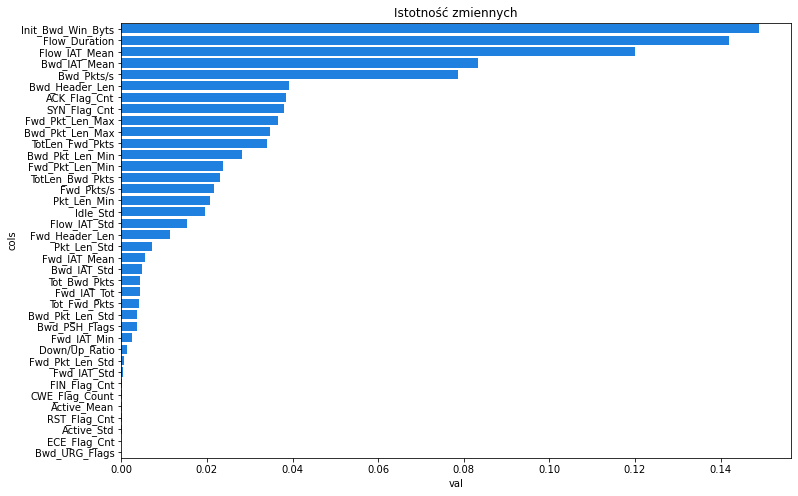

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'val', y = 'cols', data=importances, color='#0080FF')
plt.title("Istotność zmiennych")
plt.show()

Opis zmiennych: 
1. https://github.com/CanadianInstituteForCybersecurity/CICFlowMeter/blob/master/ReadMe.txt
2. https://github.com/ahlashkari/CICFlowMeter/blob/master/ReadMe.txt (chyba to raczej jest ok)

Init_Bwd_Win_Byts - The total number of bytes sent in initial window in the backward direction

Flow_Duration - Duration of the flow in Microsecond

Flow_IAT_Mean - Mean time between two packets sent in the flow

Bwd_IAT_Mean - Mean time between two packets sent in the backward direction

Bwd_Pkts/s - Number of backward packets per second

In [ ]:
import pickle

with open('idea_3_iot/rf.model', 'wb') as f:
    pickle.dump(rf, f) 

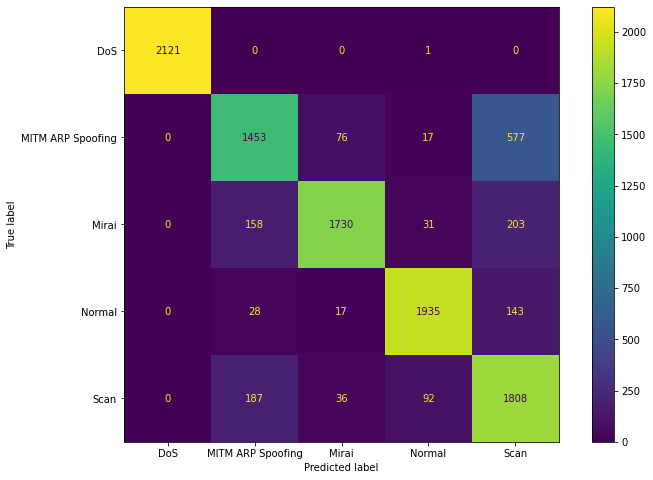

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


cm = confusion_matrix(Y_test, rf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)

fig, ax = plt.subplots(figsize=(12, 8))
disp.plot(ax=ax)
plt.show()

## Trenowanie ostatecznego modelu

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

col_names = X_train.columns.to_list()

df = pd.read_csv('idea_3_iot/IoT Network Intrusion Dataset.csv')
Y = df.Cat
X = df[col_names]

del df

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, random_state=0)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

y_hat_train = rf.predict(X_train)
y_hat_test = rf.predict(X_test)

print(f"Accuracy na zbiorze treningowym wynosi: {accuracy_score(y_train, y_hat_train)}")
print(f"Accuracy na zbiorze testowym wynosi: {accuracy_score(y_test, y_hat_test)}")

Accuracy na zbiorze treningowym wynosi: 0.8959937102764112
Accuracy na zbiorze testowym wynosi: 0.8687534356902701


In [ ]:
import pickle

with open('idea_3_iot/rf_final.model', 'rb') as f:
    rf = pickle.load(f) 

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
Y_hat = rf.predict(X_test)

In [ ]:
Y_tr_hat = rf.predict(X_train)

In [ ]:
from sklearn.metrics import f1_score

f1_score(Y_test, Y_hat, average='weighted')

0.8332132945738706

In [ ]:
f1_score(Y_train, Y_tr_hat, average='weighted')

0.8385049489483547

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, Y_hat)

0.8357674550080091

In [ ]:
accuracy_score(Y_train, Y_tr_hat)

0.8405964383303496

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(Y_test)

roc_auc_score(le.transform(np.ravel(Y_test)), rf.predict_proba(X_test), multi_class='ovr')

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9782436028652837

In [ ]:
roc_auc_score(le.transform(np.ravel(Y_train)), rf.predict_proba(X_train), multi_class='ovr')

0.9783077775212176

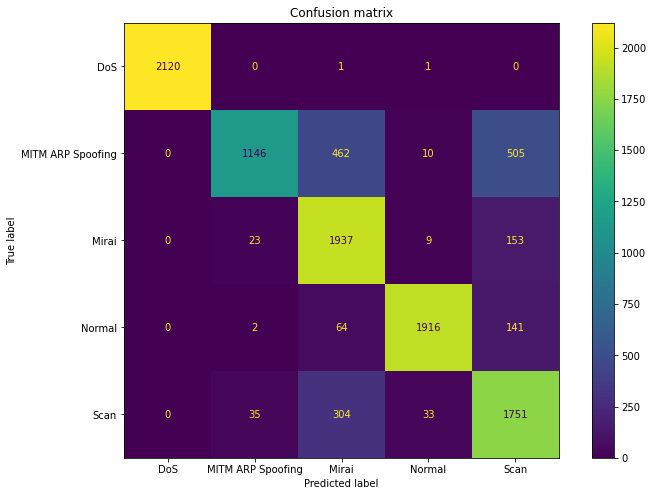

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, Y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)

fig, ax = plt.subplots(figsize=(12, 8))
disp.plot(ax=ax)
plt.title('Confusion matrix')
plt.show()